Numpy: vectors, matrices

Scipy: PDF,CDF,sampling, statistical testing, signal processing: convolution , fourier transform

In [3]:
import numpy as np
a = np.array([1,2])
b = np.array([2,1])
dot = 0
for e,f in zip(a,b):
    dot += e*f
print(dot)
print(a*b)
print(np.sum(a*b))
print((a*b).sum())
      

4
[2 2]
4
4


In [4]:
np.dot(a,b)

4

In [5]:
a.dot(b)


4

In [8]:
amag = np.sqrt((a*a).sum())
print(amag)


2.23606797749979


In [9]:
np.linalg.norm(a)

2.23606797749979

In [13]:
cosangle = a.dot(b)/(np.linalg.norm(a)*np.linalg.norm(b))
print(np.arccos(cosangle))

0.6435011087932847


In [16]:

from datetime import datetime
a = np.random.randn(100)
b= np.random.randn(100)
T = 100000

def slow_dot_product(a,b):
    dot_prod = 0
    for e,f in zip(a,b):
        dot_prod += e*f
    return dot_prod

start=datetime.now()
for t in range(T):
    slow_dot_product(a,b)

slow_time = datetime.now() - start

start = datetime.now()
for t in range(T):
    a.dot(b)

fast_time = datetime.now() - start

print(slow_time/fast_time)


23.72408362645342


In [18]:
M = np.array([[1,2],[3,4]])
L = [[1,2],[3,4]]
print(M[0][0],M[0,0])
print(L[0][0])

1 1
1


In [21]:
#Normal distribution
N = np.random.random((10,10))
print(N) 
N = np.ones((10,10))
print(N)
# Gaussian distribution
G = np.random.randn(10,10)
print(G)

[[0.94140313 0.79487542 0.53431189 0.77771863 0.69143624 0.01931719
  0.11780191 0.93182394 0.09723494 0.46404323]
 [0.21080094 0.83318427 0.65245735 0.05488573 0.51564492 0.89251884
  0.6853601  0.30801898 0.17117991 0.07116616]
 [0.35910239 0.02690801 0.87919701 0.91669027 0.58150649 0.46442041
  0.96565637 0.31300597 0.75088503 0.46446126]
 [0.8790757  0.77042499 0.94865172 0.49566133 0.26686041 0.92851227
  0.51275858 0.29967787 0.12718094 0.63437716]
 [0.42972641 0.15794478 0.8142282  0.16299728 0.49266518 0.65312835
  0.83965174 0.26370915 0.63753699 0.35126132]
 [0.46014508 0.98661393 0.11395937 0.07699581 0.64754131 0.21440171
  0.40621843 0.17281749 0.69148973 0.00701017]
 [0.23805695 0.50517168 0.84543039 0.75637857 0.19878081 0.5481786
  0.72638474 0.80643791 0.93840142 0.42442649]
 [0.96539189 0.4677722  0.74773868 0.29061507 0.54438526 0.99077716
  0.14145079 0.2086815  0.56727765 0.01097158]
 [0.63463033 0.38525807 0.54238933 0.11551666 0.80515766 0.03505357
  0.98880496 

In [23]:
print(G.mean())
print(G.var())

0.15372436723943642
0.9733140377796391


`Matrix products`: `*` is element by element multiplication, `.` is matrix multiplication.


In [28]:
A = np.array([[1,2],[3,4]])
Ainv = np.linalg.inv(A)
print(Ainv)
print(Ainv.dot(A)) #Identity matrix

[[-2.   1. ]
 [ 1.5 -0.5]]
[[1.0000000e+00 4.4408921e-16]
 [0.0000000e+00 1.0000000e+00]]


In [30]:
np.linalg.det(A)

-2.0000000000000004

In [31]:
np.diag(A)

array([1, 4])

In [32]:
np.diag([1,2])

array([[1, 0],
       [0, 2]])

#### Outer products----> covariance of some sample vectors


In [33]:
a = np.array([1,2])
b = np.array([3,4])
np.outer(a,b)

array([[3, 4],
       [6, 8]])

In [34]:
np.inner(a,b)

11

In [35]:
a.dot(b)

11

In [36]:
np.diag(A).sum()

5

In [38]:
np.trace(A) # trace of a matrix

5

#### We need to find Eigen Values and Eigen vectors of symmetric matrix like covariance variance matrix of dataset
say random data `X` and each row is a `sample` and each column is a `feature`.

In [39]:
X = np.random.randn(100,3)
cov = np.cov(X)
print(cov.shape)

(100, 100)


`Above shape is not correct as it is 100*100 and we need our covariance to be 3*3 as it has 3 dimentions`
So we do the following:

In [40]:
cov = np.cov(X.T) # we calculate covariance using the transpose of X
print(cov)

[[ 1.02543341 -0.00235027  0.03682448]
 [-0.00235027  0.91127596 -0.01054652]
 [ 0.03682448 -0.01054652  0.95413921]]


#### To calculate the Eigen Values and Eigen vectors:
`np.eig()` and `np.eigh()`---> only used for symmetric(is equal to transpose of itself) and hermitian matrices(is equal to conjugate transpose of itself).
#### The Covariance matrix is symmetric matrix so we can use np.eigh() on it


In [41]:
np.linalg.eigh(cov)

(array([0.90841162, 0.94109385, 1.0413431 ]),
 array([[-0.06742416,  0.39073429, -0.91803088],
        [ 0.95894354,  0.27941943,  0.04849813],
        [ 0.27546555, -0.87706984, -0.39353174]]))

#### Returns tuples: first tuple has (here 3) eigen values and second tuple (here 3by3) eigen vectors.


### Solving linear system:
<b>Fig </b>




In [42]:
A

array([[1, 2],
       [3, 4]])

In [55]:
A = np.array([[1,2],[3,4]])
b = np.array([1,2])
invA = np.linalg.inv(A)
x = invA.dot(b)
print(x)


[2.22044605e-16 5.00000000e-01]


#### since above operation is very common np has np.linalg.solve(A,b)

In [48]:
np.linalg.solve(A,b)

array([0. , 0.5])

#### Always use `np.linalg.solve()`

### Manually loading data

In [57]:
X = []
for line in open("data_2d.csv"):
    row = line.split(',')
    sample = map(float,row)
    X.append(row)

X = np.array(X) 
print (X)


[['17.9302012052' '94.5205919533' '320.259529602\n']
 ['97.1446971852' '69.5932819844' '404.634471526\n']
 ['81.7759007845' '5.73764809688' '181.485107741\n']
 ['55.8543424175' '70.3259016768' '321.773638018\n']
 ['49.3665499855' '75.1140401571' '322.465485583\n']
 ['3.19270246506' '29.2562988631' '94.6188108954\n']
 ['49.2007840582' '86.1444385075' '356.348092747\n']
 ['21.882803904' '46.8415051959' '181.653769226\n']
 ['79.5098627219' '87.397355535' '423.557743194\n']
 ['88.1538874975' '65.2056419279' '369.229245443\n']
 ['60.7438543399' '99.9576339008' '427.605803661\n']
 ['67.4155819451' '50.3683096094' '292.471821553\n']
 ['48.3181157719' '99.1289531425' '395.529811407\n']
 ['28.8299719729' '87.1849488537' '319.031348455\n']
 ['43.853742664' '64.4736390798' '287.4281441\n']
 ['25.3136940868' '83.5452942552' '292.768908839\n']
 ['10.807726675' '45.6955685904' '159.663307674\n']
 ['98.365745882' '82.6973935253' '438.798963866\n']
 ['29.1469099692' '66.3651067611' '250.986309034\n']


In [59]:
X.shape

(100, 3)

## PANDAS

In [65]:
import pandas as pd
X = pd.read_csv("data_2d.csv",header=None)
print(X.head())
print(X.info())

           0          1           2
0  17.930201  94.520592  320.259530
1  97.144697  69.593282  404.634472
2  81.775901   5.737648  181.485108
3  55.854342  70.325902  321.773638
4  49.366550  75.114040  322.465486
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
0    100 non-null float64
1    100 non-null float64
2    100 non-null float64
dtypes: float64(3)
memory usage: 2.4 KB
None


In [69]:
#X[2,2] returns error obviously but can be fixed 
#converting the dataframe into matrix
M = X.as_matrix()
M[2,2]

181.48510774099998

### pandas demo

In [71]:
df = pd.read_csv('international-airline-passengers.csv',engine='python',skipfooter=3)
df.columns

Index(['Month', 'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'], dtype='object')

In [72]:
df.columns = ['Month','Passengers']

In [73]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


`df.passengers` and `df['passengers']` are the same thing

`df['x1x2'] = df.apply(lambda row: row['x1']*row['x2'],axis=1)`

### Joins 
`pd.merge(t1,t2,on='user_id')`<br>
`t1.merge(t2,on='user_id')`

### Matplotlib


In [76]:
import matplotlib.pyplot as plt

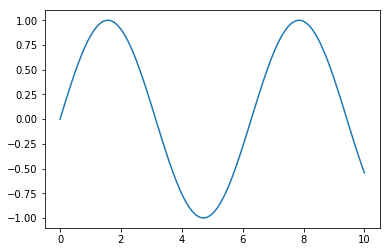

In [78]:
x = np.linspace(0,10,100)
y = np.sin(x)
plt.plot(x,y)

#### scatter plot

In [79]:
mat = pd.read_csv("data_1d.csv",header=None).as_matrix()

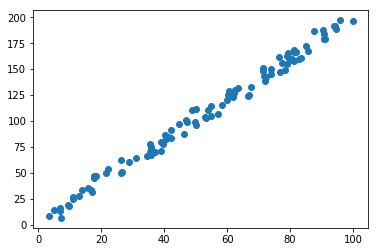

In [81]:
x = mat[:,0]
y = mat[:,1]
plt.scatter(x,y)

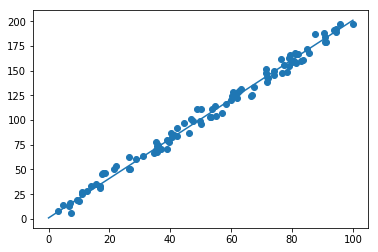

In [83]:
x_line=np.linspace(0,100,100)
y_line = 2*x_line+1
plt.scatter(x,y)
plt.plot(x_line,y_line)

(array([10.,  9.,  5., 13., 10., 10.,  8., 16., 10.,  9.]),
 array([ 3.21124861, 12.88597188, 22.56069515, 32.23541842, 41.91014169,
        51.58486496, 61.25958823, 70.9343115 , 80.60903477, 90.28375804,
        99.95848131]),
 <a list of 10 Patch objects>)

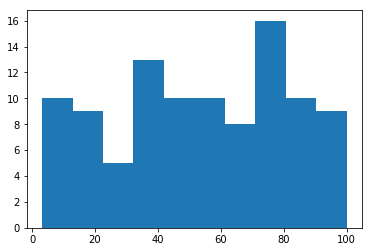

In [84]:
plt.hist(x)

### Say for example, for error in linear regression we assume that the error is normally distributed.i.e if we take actual y and subtract it from the points on the line, we get normally distributed data.


(array([ 6.,  7., 15., 14., 12., 18., 13.,  7.,  6.,  2.]),
 array([-9.78834827, -7.57337797, -5.35840768, -3.14343738, -0.92846708,
         1.28650321,  3.50147351,  5.7164438 ,  7.9314141 , 10.14638439,
        12.36135469]),
 <a list of 10 Patch objects>)

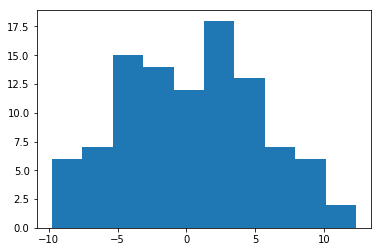

In [86]:
y_actual = 2*x + 1
residuals = y-y_actual
plt.hist(residuals)

### using digit image classifier data from kaggle lets plot an image from the dataset


In [87]:
df = pd.read_csv("train.csv")

In [90]:
df.shape # 42000 samples and 785 columns and one of them is label


(42000, 785)

In [97]:
M = df.as_matrix()
im = M[0,1:]
im.shape

(784,)

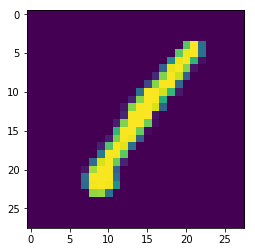

In [100]:
im=im.reshape(28,28)
plt.imshow(im)

In [101]:
M[0,0]

1

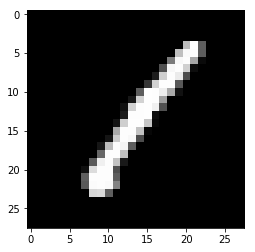

In [102]:
plt.imshow(im,cmap='gray')

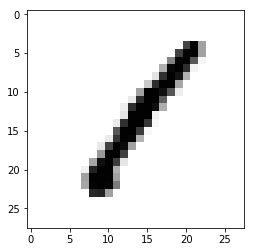

In [103]:
plt.imshow(255-im,cmap='gray')

## Scipy library

<b>Fig Gaussian distribution</b>



`Given a sample variable what is its Probability Density function?`

In [104]:
from scipy.stats import norm

In [106]:
norm.pdf(0) # PDF of 0 from standard normal distribution


0.3989422804014327

`Sometimes we could be working with a Gaussian which has mean greater other than 0 and variance other than 1` so that can be passed in pdf function as well.<br>


In [107]:
norm.pdf(0,loc=5,scale=10)#pdf for 0 with mean 5 and std 10


0.03520653267642995

In [108]:
r = np.random.randn(10)#say random array of size 10 
# pdf for every value can be calculated at same time
norm.pdf(r)

array([0.21505934, 0.11381471, 0.04814874, 0.30788207, 0.35572962,
       0.10309049, 0.36336084, 0.24609365, 0.39690283, 0.38525804])

### We need the Log Pdf, when we want to calculate the joint probability of some samples of data, we have to find product of the probabilities but for joint log probability we can add the log probabilities. Since adding is computationally cheaper than multiplying, it becomes easier to work with joint log probabilities. And since the form of Gaussian is exponential, when we take the log, exponential goes away, and this also ease the computations. So it is more convenient to work with log probabilities than with normal pdfs.

<b>fig Log PDF</b>


`norm.logpdf(r)`

In [109]:
norm.logpdf(r)

array([-1.53684128, -2.17318346, -3.0334604 , -1.17803846, -1.03358434,
       -2.2721481 , -1.01235889, -1.40204314, -0.92406378, -0.95384193])

### CDF : cummulative distribution function ; integral of pdf from minus infinity to x. Not solvable(so no mathematical equation available) we can compute it numerically.`norm.cdf()`


In [110]:
norm.cdf(r)

array([0.13314049, 0.9433828 , 0.01986891, 0.76419471, 0.31602479,
       0.04997255, 0.66722041, 0.83718629, 0.54032189, 0.39580914])

In [111]:
norm.logcdf(r)

array([-2.01635043, -0.05828314, -3.91859899, -0.26893267, -1.15193461,
       -2.99628133, -0.40463483, -0.17770866, -0.61559022, -0.92682314])

(array([  2.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   2.,
          0.,   2.,   1.,   5.,   7.,  10.,   4.,  11.,   9.,  16.,  13.,
         17.,  33.,  23.,  40.,  36.,  40.,  48.,  52.,  87.,  83., 102.,
        120., 140., 143., 163., 194., 215., 222., 235., 270., 242., 286.,
        301., 288., 325., 353., 317., 311., 341., 315., 321., 360., 298.,
        319., 302., 282., 293., 257., 234., 202., 196., 175., 185., 154.,
        122., 133.,  98.,  92.,  93.,  72.,  60.,  58.,  53.,  49.,  24.,
         34.,  16.,  17.,  17.,  14.,   8.,   6.,   5.,  10.,   3.,   1.,
          3.,   1.,   2.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,
          2.]),
 array([-4.23474697, -4.15093963, -4.0671323 , -3.98332496, -3.89951762,
        -3.81571029, -3.73190295, -3.64809562, -3.56428828, -3.48048094,
        -3.39667361, -3.31286627, -3.22905893, -3.1452516 , -3.06144426,
        -2.97763693, -2.89382959, -2.81002225, -2.72621492, -2.64240758,
        -2.55860024, -2.47

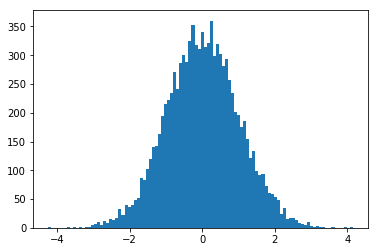

In [116]:
nr=np.random.randn(10000) #samples from normal gaussian distrubution
sr = 10*np.random.randn(10000)+5 # samples from gaussian distribution with mean 5 and std 10.
plt.hist(nr,bins=100)



(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   2.,   1.,   1.,
          2.,   2.,   3.,   3.,   6.,   8.,   8.,   4.,  17.,  18.,   9.,
         19.,  22.,  38.,  31.,  45.,  42.,  63.,  70.,  78., 107., 108.,
        127., 136., 158., 165., 178., 179., 202., 247., 250., 271., 257.,
        296., 256., 286., 312., 337., 321., 374., 317., 322., 298., 324.,
        269., 292., 307., 272., 253., 241., 224., 209., 193., 162., 175.,
        155., 117., 115., 111., 100.,  75.,  65.,  50.,  57.,  39.,  30.,
         36.,  27.,  19.,  24.,  11.,   9.,  12.,   5.,   3.,   3.,   5.,
          3.,   2.,   1.,   1.,   1.,   2.,   1.,   0.,   0.,   1.,   0.,
          1.]), array([-36.38089664, -35.56517741, -34.74945818, -33.93373895,
        -33.11801973, -32.3023005 , -31.48658127, -30.67086204,
        -29.85514281, -29.03942359, -28.22370436, -27.40798513,
        -26.5922659 , -25.77654667, -24.96082744, -24.14510822,
        -23.32938899, -22.51366976, -21.69795053, -20.8822313 ,

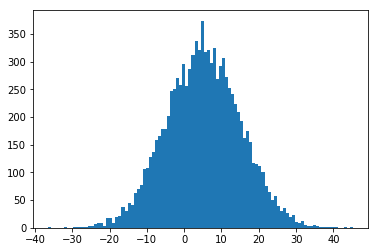

In [117]:
plt.hist(sr,bins=100)

### Sampling from Gaussian distribution spherical and axis aligned elliptical:
When we work with `multidimentional data`, to sample 2d gaussian wi th mean 0 and variance 1. This will be spherical gaussian as each dimention is uncorrelated and independent of other, all have same variance. For this when we plot the data, it has to be circles.


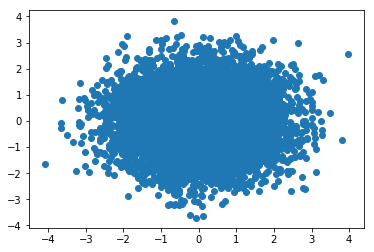

In [118]:
r = np.random.randn(10000,2) # adding more dimension
plt.scatter(r[:,0],r[:,1]) # to visualize the spread

#### For elliptical gaussian, i.e. the variance is different for each dimention,say we need the std of 2nd dimention to be 5 and mean to be 2.


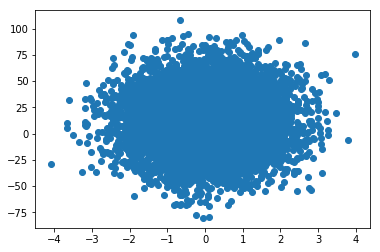

In [122]:
r[:,1] = 5*r[:,1]+2
plt.scatter(r[:,0],r[:,1])

### the fig above is not looking elliptical as matplotlib is scaling the axis and thus they tend to scatter equally.

(-4.509554175933339, 4.387437979917057, -89.8701396422804, 117.39362048849)

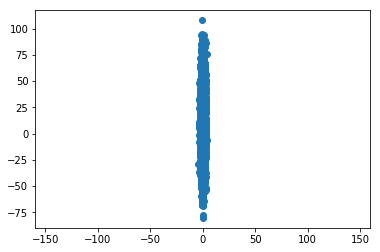

In [123]:
plt.scatter(r[:,0],r[:,1])
plt.axis('equal')


### Sampling General Multivariate Normal distributions.
Dimentions are not necessarily independent from one another.<br>
i.e we have a `Full covariance matrix` <br>


In [124]:
cov = np.array([[1,0.8],[0.8,3]])  

`here this means variance of 1 in first dimention, variance of 3 in 2nd dimention and covariance of between the two dimentions is 0.8`

In [126]:
# importing the module for multivariate normal
from scipy.stats import multivariate_normal as mvn
mu = np.array([0,2])# putting the mean at 0,2
r = mvn.rvs(mean=mu, cov=cov, size=1000) 

`rvs is used to sample from multivariate normal distribution, takes mean, cov and size(parameter to determine number of samples)`

(-4.164320153853319, 3.635432773106091, -3.0988906146430217, 7.718225783178618)

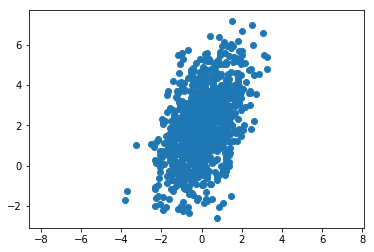

In [127]:
plt.scatter(r[:,0],r[:,1])
plt.axis('equal')

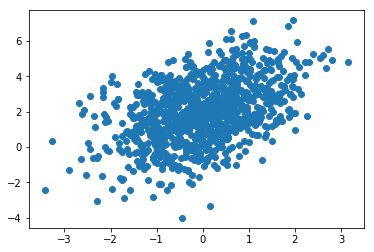

In [128]:
r = np.random.multivariate_normal(mean=mu,cov=cov,size=1000)
plt.scatter(r[:,0],r[:,1])

### Other interesting scipy functions
`scipy.io.loadmat`---> for .mat files<br>
`scipy.io.wavfile.read`---> for audio(wav files)
<b>fig WAV files</b>

`scipy.signal`---> for signal processing---> convolutions(`convolve,convolve2d,correlate,correlate2d...`), B-splines(`bspline,quadratic,cubic,gauss_spline...`) <br>
`fast fourier transform`(signal processing function)---> is in `numpy`, it converts the signal from time domain to frequency domain.<br>
i.e it will show us the frequency components of the original signal.<br>

<b>lets sin wave for multiple frequencies</b>


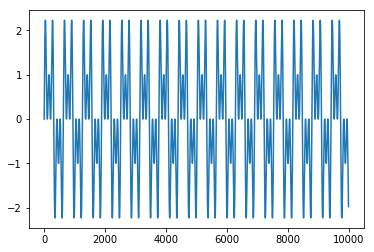

In [129]:
x = np.linspace(0,100,10000)
y = np.sin(x)+np.sin(3*x)+np.sin(5*x)
plt.plot(y)

`Above is periodic wave with multiple frequency components`

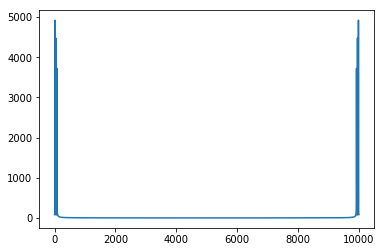

In [130]:
Y = np.fft.fft(y)# FFT gives us signal with complex number so before plotting we get the magnitude
plt.plot(np.abs(Y))

The spikes are at 16, 48, 80 and <br>
so to calculate the actual frequency we use 2*(pi)*x/100. hence it will be

In [131]:
print(2*np.pi*16/100,2*np.pi*48/100,2*np.pi*80/100)

1.0053096491487339 3.015928947446201 5.026548245743669


`These are the original frequencies`